In [1]:
# This changes the current directory to the base saga directory - make sure to run this first!
# This is necessary to be able to import the py files and use the right directories,
# while keeping all the notebooks in their own directory.
import os
import sys
import numpy as np

if 'saga_base_dir' not in locals():
    saga_base_dir = os.path.abspath('..')
if saga_base_dir not in sys.path:
    os.chdir(saga_base_dir)

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['image.interpolation'] = 'none'
rcParams['figure.figsize'] = (16, 10)

In [3]:
import targeting

In [4]:
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord, Latitude, Longitude

# [Karachentsev+ 15](http://arxiv.org/abs/1511.00955)

In [5]:
k15_tab2_colnames = 'Name,RA(2000.0)Dec,T,B,a,SB,rp,Rp,M_B,A,comments'.split(',')
k15_tab2_colunits = [None, None, None, u.mag, u.arcmin, None, u.arcmin, u.kpc, u.mag, u.kpc,None]
k15_tab2_data = r"""
\begin{table}
\begin{tabular}{ccccccccccc}
NGC\,672\,dwB   & 014711.1+274100 & Ir-VL  &  21.0 &  0.20 & 25.8 & 17.7~~ & 37  & $-8.6$  & 0.42 & \\
NGC\,672\,dwA   & 014719.1+271516 & Ir-L   &  19.8 &  0.26 & 25.2 & 13.1~~ & 27  & $-9.8$  & 0.54 & GALEX\\
NGC\,672\,dwC   & 014720.4+274324 & Sph-L  &  18.7 &  0.40 & 25.0 & 18.9~~ & 39  & $-10.9$ & 0.83 & \\
NGC\,891\,dwA   & 022112.4+422150 & Tr-L   &  17.9 &  0.76 & 25.7 & 14.9~~ & 43  & $-12.3$ & 2.20 & [TT09]25\\
NGC\,891\,dwB   & 022254.7+424245 & Ir-VL  &  18.9 &  1.16 & 27.6 & 22.4~~ & 65  & $-11.3$ & 3.36 & [TT09]30\\
NGC\,1156\,dw1  & 030018.2+251456 & Ir-L   &  19.6 &  0.38 & 25.2 & 8.1~~  & 18  & $-10.8$ & 0.86 & \\
NGC\,1156\,dw2  & 030028.0+251817 & Ir-VL  &  20.0 &  0.38 & 25.6 & 11.1~~ & 25  & $-10.4$ & 0.86 & GALEX\\
NGC\,2683\,dw1  & 085326.8+331820 & Ir-L   &  19.0 &  0.40 & 25.5 & 11.7~~ & 32  & $-11.0$ & 1.09 & GALEX\\
NGC\,2683\,dw2  & 085420.5+331458 & Sph-VL &  19.6 &  0.40 & 26.1 & 23.1~~ & 63  & $-10.4$ & 1.09 & \\
NGC\,3344\,dw1  & 104244.0+250130 & Ir-VL  &  20.0 &  0.30 & 26.0 & 11.9~~ & 34  & $-10.1$ & 0.86 & \\
NGC\,4258\,dwC  & 121026.8+464449 & Sph-L  &  19.0 &  0.27 & 24.7 & 93.3~~ & 212 & $-10.5$ & 0.61 & \\
NGC\,4258\,dwA  & 121551.0+473256 & Ir-L   &  19.0 &  0.43 & 25.7 & 34.8~~ & 79  & $-10.5$ & 0.98 & \\
NGC\,4258\,dwB  & 122410.9+470723 & Sph-L  &  18.3 &  0.45 & 25.1 & 54.6~~ & 124 & $-11.2$ & 1.02 & BTS134\\
NGC\,4631\,dw1  & 124057.0+324733 & Ir-VL  &  16.1 &  2.20 & 26.4 & 21.3~~ & 46  & $-13.3$ & 4.72 & GALEX\\
NGC\,4631\,dw2  & 124206.8+323715 & Ir-VL  &  18.5 &  0.90 & 26.8 & 4.8~~  & 10  & $-10.9$ & 1.93 & GALEX\\
NGC\,4625\,A    & 124211.0+411510 & Tr-L   &  18.6 &  0.45 & 25.4 & 9.4~~  & 22  & $-11.0$ & 1.03 & \\
NGC\,4631\,dw3  & 124252.5+322735 & Sph-VL &  19.7 &  0.60 & 27.1 & 10.6~~ & 23  & $-9.7$  & 1.29 & \\
M\,101\,DF3     & 140305.7+533656 & Sph-VL &  17.9 &  1.00 & 26.5 & 44.1~~ & 95  & $-11.5$ & 2.15 & \\
M\,101\,DF1     & 140345.0+535640 & Ir-L   &  18.9 &  0.47 & 25.8 & 23.9~~ & 51  & $-10.5$ & 1.01 & \\
M\,101\,dwD     & 140424.6+531619 & Sph-VL &  19.2 &  0.38 & 25.7 & 65.6~~ & 141 & $-10.2$ & 0.81 & \\
M\,101\,dwC     & 140518.0+545356 & Tr-VL  &  20.2 &  0.30 & 26.2 & 37.6~~ & 81  & $-9.2$  & 0.64 & \\
M\,101\,DF7     & 140548.3+550758 & Sph-XL &  20.4 &  0.67 & 28.1 & 52.0~~ & 117 & $-9.0$  & 1.44 & \\
M\,101\,dwA     & 140650.2+534432 & Sph-L  &  19.2 &  0.36 & 25.6 & 45.3~~ & 97  & $-10.2$ & 0.77 & \\
M\,101\,DF4     & 140733.4+544236 & Ir-XL  &  18.8 &  0.93 & 27.2 & 43.5~~ & 93  & $-10.6$ & 1.99 & \\
M\,101\,DF6     & 140819.0+551124 & Ir-XL  &  20.1 &  0.73 & 28.0 & 67.2~~ & 144 & $-9.3$  & 1.57 & \\
M\,101\,DF2     & 140837.5+541931 & Sph-L  &  19.8 &  0.33 & 26.0 & 47.1~~ & 101 & $-9.6$  & 0.71 & \\
M\,101\,dwB     & 140843.1+550957 & Sph-VL &  20.1 &  0.30 & 26.1 & 68.0~~ & 146 & $-9.3$  & 0.64 & \\
\end{tabular}
\end{table}
""".replace('~','').replace('\,', '').replace('$', '')

k15_tab2 = Table.read(k15_tab2_data.split('\n'), format='latex', names=k15_tab2_colnames, guess=False)
k15_tab2

Name,RA(2000.0)Dec,T,B,a,SB,rp,Rp,M_B,A,comments
string80,string120,string48,float64,float64,float64,float64,int64,float64,float64,string64
NGC672dwA,014719.1+271516,Ir-L,19.8,0.26,25.2,13.1,27,-9.8,0.54,GALEX
NGC672dwC,014720.4+274324,Sph-L,18.7,0.4,25.0,18.9,39,-10.9,0.83,--
NGC891dwA,022112.4+422150,Tr-L,17.9,0.76,25.7,14.9,43,-12.3,2.2,[TT09]25
NGC891dwB,022254.7+424245,Ir-VL,18.9,1.16,27.6,22.4,65,-11.3,3.36,[TT09]30
NGC1156dw1,030018.2+251456,Ir-L,19.6,0.38,25.2,8.1,18,-10.8,0.86,--
NGC1156dw2,030028.0+251817,Ir-VL,20.0,0.38,25.6,11.1,25,-10.4,0.86,GALEX
NGC2683dw1,085326.8+331820,Ir-L,19.0,0.4,25.5,11.7,32,-11.0,1.09,GALEX
NGC2683dw2,085420.5+331458,Sph-VL,19.6,0.4,26.1,23.1,63,-10.4,1.09,--
NGC3344dw1,104244.0+250130,Ir-VL,20.0,0.3,26.0,11.9,34,-10.1,0.86,--


In [6]:
k15_dw_radecs = [radec.split('+') for radec in k15_tab2['RA(2000.0)Dec']]
k15_dw_ras = [Longitude((int(s[:2]), int(s[2:4]), float(s[4:8])), unit=u.hourangle) for s in k15_tab2['RA(2000.0)Dec']]
k15_dw_decs = [Latitude((int(s[8:11]), int(s[11:13]), float(s[13:])), unit=u.deg) for s in k15_tab2['RA(2000.0)Dec']]
k15_dw_scs = SkyCoord(k15_dw_ras, k15_dw_decs)

In [7]:
targeting.sampled_imagelist(k15_dw_scs, None, 100, names=['{}_B={}_SB={}'.format(e['Name'], e['B'], e['SB']) for e in k15_tab2])

'name ra dec\nNGC672dwA_B=19.8_SB=25.2 26.8295833333 27.2544444444\nNGC672dwC_B=18.7_SB=25.0 26.835 27.7233333333\nNGC891dwA_B=17.9_SB=25.7 35.3016666667 42.3638888889\nNGC891dwB_B=18.9_SB=27.6 35.7279166667 42.7125\nNGC1156dw1_B=19.6_SB=25.2 45.0758333333 25.2488888889\nNGC1156dw2_B=20.0_SB=25.6 45.1166666667 25.3047222222\nNGC2683dw1_B=19.0_SB=25.5 133.361666667 33.3055555556\nNGC2683dw2_B=19.6_SB=26.1 133.585416667 33.2494444444\nNGC3344dw1_B=20.0_SB=26.0 160.683333333 25.025\nNGC4258dwC_B=19.0_SB=24.7 182.611666667 46.7469444444\nNGC4258dwA_B=19.0_SB=25.7 183.9625 47.5488888889\nNGC4258dwB_B=18.3_SB=25.1 186.045416667 47.1230555556\nNGC4631dw1_B=16.1_SB=26.4 190.2375 32.7925\nNGC4631dw2_B=18.5_SB=26.8 190.528333333 32.6208333333\nNGC4625A_B=18.6_SB=25.4 190.545833333 41.2527777778\nNGC4631dw3_B=19.7_SB=27.1 190.71875 32.4597222222\nM101DF3_B=17.9_SB=26.5 210.77375 53.6155555556\nM101DF1_B=18.9_SB=25.8 210.9375 53.9444444444\nM101dwD_B=19.2_SB=25.7 211.1025 53.2719444444\nM101dwC_B=

### See if they are in ML 

In [8]:
mlpred = Table.read('catalogs/SAGA.ALL.objid_rescaledrobs_pred.Oct28_SDSS_nopreclean.csv.fits.gz')
mlpred

OBJID,RA,DEC,DERED_R,PROBABILITY_CLASS_1,RESCALED_PROBABILITY_CLASS_1,BEST_GUESS_CLASS
int64,float64,float64,float64,float64,float64,int64
1237645941824356440,40.2877964113,-0.735647060949,16.7594,0.00157168316197,0.000345859198981,0
1237645941824356442,40.2745834514,-0.733014063478,17.4514,0.000372493836691,8.19307625291e-05,0
1237645941824356481,40.2721052363,-0.642510253204,16.7911,0.00178514575454,0.000358794024809,0
1237645941824356483,40.2712777717,-0.640725293001,20.9894,0.000240454811286,5.13915737065e-05,0
1237645941824356484,40.2783697699,-0.641212507445,21.2884,0.000270864809902,5.63874521068e-05,0
1237645941824356485,40.2826647047,-0.642892947061,22.4926,3.61806080935e-05,0.0,0
1237645941824356497,40.2846730128,-0.817180215799,14.8628,0.000363130559728,8.19307625291e-05,0
1237645941824356500,40.2881452154,-0.805045508948,14.3826,0.000488674982738,8.85746681048e-05,0
1237645941824356501,40.2854134086,-0.804100473432,20.2454,0.000763301466982,0.000162326503484,0


(array([ 2.,  2.,  3.,  0.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  1.87624035,   2.13026146,   2.38428258,   2.6383037 ,
          2.89232482,   3.14634594,   3.40036706,   3.65438818,
          3.9084093 ,   4.16243042,   4.41645154,   4.67047266,
          4.92449378,   5.1785149 ,   5.43253602,   5.68655713,
          5.94057825,   6.19459937,   6.44862049,   6.70264161,
          6.95666273,   7.21068385,   7.46470497,   7.71872609,
          7.97274721,   8.22676833,   8.48078945, 

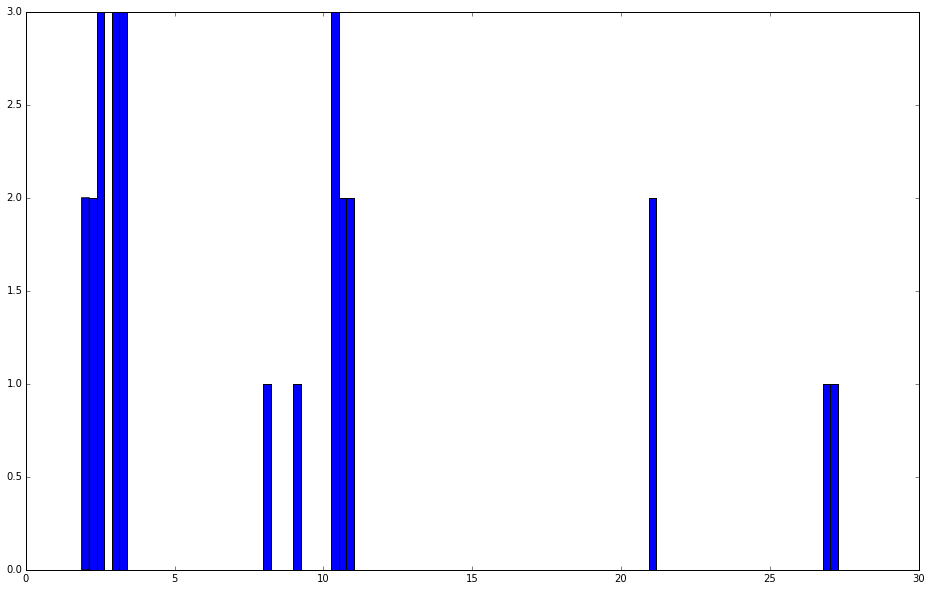

In [24]:
mlsc = SkyCoord(mlpred['RA'], mlpred['DEC'], unit=u.deg)
idx, d2d, _ = k15_dw_scs.match_to_catalog_sky(mlsc)
plt.hist(d2d.deg,bins=100)

Looks like the mlpred file only has saga hosts